In [129]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
from voting_mechanism_design.agents.pairwise_badgeholder import PairwiseBadgeholder, PairwiseBadgeholderPopulation
from voting_mechanism_design.projects.project import Project, ProjectPopulation
from voting_mechanism_design.funds_distribution.pairwise_binary import PairwiseBinary
from voting_mechanism_design.sim import RoundSimulation

import itertools
import numpy as np

In [131]:
# round design variables

In [132]:
# create the badgeholders
n = 10
badgeholder_list = []
for ii in range(n):
    badgeholder_id = ii
    agent = PairwiseBadgeholder(
        badgeholder_id=badgeholder_id
    )
    badgeholder_list.append(agent)
badgeholders = PairwiseBadgeholderPopulation()
badgeholders.add_badgeholders(badgeholder_list)

In [133]:
# create projects
N = 20
projects = []
for ii in range(N):
    project_id = ii
    project = Project(
        project_id=project_id,
        true_impact=1,  # TODO: this should be a random variable
        owner_id=None,  # used for COI modeling
    )
    projects.append(project)
project_population = ProjectPopulation()
project_population.add_projects(projects)

In [134]:
fund_distribution_model = PairwiseBinary()

In [135]:
# create and run a simulation
simulation_obj = RoundSimulation(
    badgeholder_population=badgeholders,
    projects=project_population,
    funding_design=fund_distribution_model,
)
voting_view_ix = itertools.combinations(range(project_population.num_projects), 2)
voting_view = []
for ix1, ix2 in voting_view_ix:
    voting_view.append((project_population.get_project(ix1), project_population.get_project(ix2)))
# print(voting_view)
simulation_obj.run(cast_votes_kwargs={'view': voting_view})

In [136]:
project_list = simulation_obj.projects.projects
all_votes = []
for p in project_list:
    # print(p.project_id, p.votes)
    all_votes.append(p.votes)
all_votes = np.array(all_votes)

<Axes: >

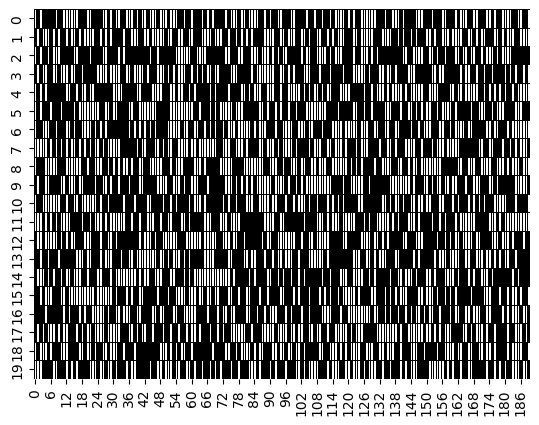

In [140]:
import seaborn as sns
# sns.heatmap(all_votes, annot=True, fmt='d', cmap='viridis')
sns.heatmap(all_votes, cmap='binary', cbar=False, linewidths=0.5, linecolor='black', square=True)


In [138]:
# get metrics